In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
from keras.utils.np_utils import *

TARGET_LYING = 1
TARGET_SITTING = 1
TARGET_STAND = 1
TARGET_FALL = 0
TARGET_NO_FALL = 1

TARGET_DIM = 2

def handleData(datas, frac = None):
    od = pd.concat(datas, axis=0)
    if frac is not None:
        d = od.sample(frac=frac)
    else:
        d = od
    ds = pd.DataFrame(d, columns=d.columns[:-1])
    tx = ds
    ty = to_categorical(d['target'], TARGET_DIM)
    return (tx, ty)

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
# df_sitting_test = pd.read_csv('mdata/rows/bed_test/sitting.csv')
# df_sitting_test['target'] = TARGET_SITTING
# df_fall_test = pd.read_csv('mdata/rows/bed_test/fall.csv')
# df_fall_test['target'] = TARGET_FALL
# df_stand_test = pd.read_csv('mdata/rows/bed_test/stand.csv')
# df_stand_test['target'] = TARGET_STAND

df_fall = pd.read_csv('mdata/rows/BedTest-fall.csv')
df_fall['target'] = TARGET_FALL
df_no_fall = pd.read_csv('mdata/rows/BedTest-no-fall.csv')
df_no_fall['target'] = TARGET_NO_FALL

def testAcc(_model, frac = None):
    tx, ty = handleData([df_fall, df_no_fall], frac)

    score = _model.evaluate(tx, ty)
    print ('Acc:', score[1])
    return score[1]

713/713 [==============================] - 0s 240us/sample - loss: 0.0923 - acc: 0.9776
Acc: 0.9775596
570/570 [==============================] - 0s 101us/sample - loss: 0.0991 - acc: 0.9772
Acc: 0.977193
428/428 [==============================] - 0s 255us/sample - loss: 0.1129 - acc: 0.9720
Acc: 0.97196263
285/285 [==============================] - 0s 383us/sample - loss: 0.0727 - acc: 0.9825
Acc: 0.98245615
143/143 [==============================] - 0s 271us/sample - loss: 0.0978 - acc: 0.9790
Acc: 0.97902095


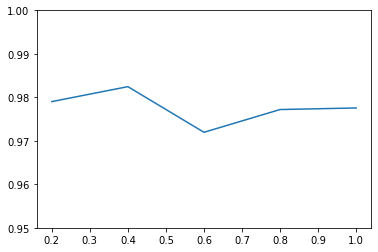

In [7]:
tmodel = keras.models.load_model('./mdata/model/model_2')
scores = []
rgs = np.arange(1, 0, -0.2)
for i in rgs:
    acc = testAcc(tmodel, i)
    scores.append(acc)
plt.plot(rgs, scores)
plt.ylim(0.95, 1)
plt.show()

In [9]:
scores

[0.9775596, 0.977193, 0.97196263, 0.98245615, 0.97902095]